# 1. Load Data From CSV File

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV as GS
%matplotlib inline

In [270]:
df = pd.read_csv('PMA data/goodreads.csv', low_memory=False)

In [271]:
df.head(5)

,id,title,link,series,cover_link,author,author_link,rating_count,review_count,average_rating,...,asin,settings,characters,awards,amazon_redirect_link,worldcat_redirect_link,recommended_books,books_in_series,description,Target
0,630104,Inner Circle,https://www.goodreads.com//book/show/630104.In...,(Private #5),https://i.gr-assets.com/images/S/compressed.ph...,"Kate Brian, Julian Peploe",https://www.goodreads.com/author/show/94091.Ka...,7597.0,196.0,4.03,...,NaN,NaN,NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"726458, 726458, 1537534, 3047848, 1651302, 304...","381489, 381501, 352428, 630103, 1783281, 17832...",Reed Brennan arrived at Easton Academy expecti...,0.0
1,9487,A Time to Embrace,https://www.goodreads.com//book/show/9487.A_Ti...,(Timeless Love #2),https://i.gr-assets.com/images/S/compressed.ph...,Karen Kingsbury,https://www.goodreads.com/author/show/3159984....,4179.0,177.0,4.35,...,NaN,NaN,NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"127352, 127352, 40642197, 127353, 127354, 3891...",115036,Ideje az ÃÂ¶lelÃÂ©snek TÃÂ¶rtÃÂ©net a remÃ...,0.0
2,6050894,Take Two,https://www.goodreads.com//book/show/6050894-t...,(Above the Line #2),https://i.gr-assets.com/images/S/compressed.ph...,Karen Kingsbury,https://www.goodreads.com/author/show/3159984....,6288.0,218.0,4.23,...,NaN,"Bloomington, Indiana(United States)",NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"706250, 706250, 666481, 11942636, 706241, 1273...","4010795, 40792877, 7306261",Filmmakers Chase Ryan and Keith Ellison have c...,0.0
3,39030,Reliquary,https://www.goodreads.com//book/show/39030.Rel...,(Pendergast #2),https://i.gr-assets.com/images/S/compressed.ph...,"Douglas Preston, Lincoln Child",https://www.goodreads.com/author/show/12577.Do...,38382.0,1424.0,4.01,...,NaN,"New York State(United States) New York City, N...","Aloysius X.L. Pendergast, Margo Green, William...",NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"39026, 39026, 11007668, 3986318, 51887330, 194...","67035, 39031, 39033, 136637, 136638, 30068, 39...",NaN,0.0
4,998,The Millionaire Next Door: The Surprising Secr...,https://www.goodreads.com//book/show/998.The_M...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,"Thomas J. Stanley, William D. Danko",https://www.goodreads.com/author/show/659.Thom...,72168.0,3217.0,4.04,...,NaN,NaN,NaN,Independent Publisher Book Award (IPPY) Nomine...,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"1052, 1052, 763362, 69571, 78427, 30186948, 10...",NaN,The incredible national bestseller that is cha...,1.0


# 2. Drop useless columns

#### Since those links are not very informative, so we gonna drop these columns

In [272]:
df.drop(labels=['link', 'cover_link', 'author_link', 'amazon_redirect_link', 'worldcat_redirect_link'], axis=1, inplace=True)

In [273]:
df.head(5)

,id,title,series,author,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,...,isbn,isbn13,asin,settings,characters,awards,recommended_books,books_in_series,description,Target
0,630104,Inner Circle,(Private #5),"Kate Brian, Julian Peploe",7597.0,196.0,4.03,3045.0,2323.0,1748.0,...,1416950419,9.78E+12,NaN,NaN,NaN,NaN,"726458, 726458, 1537534, 3047848, 1651302, 304...","381489, 381501, 352428, 630103, 1783281, 17832...",Reed Brennan arrived at Easton Academy expecti...,0.0
1,9487,A Time to Embrace,(Timeless Love #2),Karen Kingsbury,4179.0,177.0,4.35,2255.0,1290.0,518.0,...,1595542329,9.78E+12,NaN,NaN,NaN,NaN,"127352, 127352, 40642197, 127353, 127354, 3891...",115036,Ideje az ÃÂ¶lelÃÂ©snek TÃÂ¶rtÃÂ©net a remÃ...,0.0
2,6050894,Take Two,(Above the Line #2),Karen Kingsbury,6288.0,218.0,4.23,3000.0,2020.0,1041.0,...,NaN,NaN,NaN,"Bloomington, Indiana(United States)",NaN,NaN,"706250, 706250, 666481, 11942636, 706241, 1273...","4010795, 40792877, 7306261",Filmmakers Chase Ryan and Keith Ellison have c...,0.0
3,39030,Reliquary,(Pendergast #2),"Douglas Preston, Lincoln Child",38382.0,1424.0,4.01,12711.0,15407.0,8511.0,...,765354950,9.78E+12,NaN,"New York State(United States) New York City, N...","Aloysius X.L. Pendergast, Margo Green, William...",NaN,"39026, 39026, 11007668, 3986318, 51887330, 194...","67035, 39031, 39033, 136637, 136638, 30068, 39...",NaN,0.0
4,998,The Millionaire Next Door: The Surprising Secr...,NaN,"Thomas J. Stanley, William D. Danko",72168.0,3217.0,4.04,27594.0,25219.0,14855.0,...,671015206,9.78E+12,NaN,NaN,NaN,Independent Publisher Book Award (IPPY) Nomine...,"1052, 1052, 763362, 69571, 78427, 30186948, 10...",NaN,The incredible national bestseller that is cha...,1.0


#### There are four columns data could be used to identify a book

In [274]:
df[['id','isbn','isbn13','asin']].head(20)

,id,isbn,isbn13,asin
0,630104,1416950419,9.78E+12,NaN
1,9487,1595542329,9.78E+12,NaN
2,6050894,NaN,NaN,NaN
3,39030,765354950,9.78E+12,NaN
4,998,671015206,9.78E+12,NaN
5,311164,99468034,9.78E+12,NaN
6,32105,373836082,9.78E+12,NaN
7,377993,1565124138,9.78E+12,NaN
8,71292,752866052,9.78E+12,NaN
9,821003,525444459,9.78E+12,NaN


It is obvious that  almost all the values of  'asin'  are  the NaN, so it is better to drop this column. The 'isbn13' are standard international book number, 'isbn13' and 'isbn' both are identification number. But in this data we could use 'id' as the unique identification number. Therefore, it is reasonable to drop 'asin' , 'isbn13' and 'isbn'.

In [275]:
df.drop(columns=['isbn13', 'isbn', 'asin'], inplace=True)

In [276]:
df.head(5)

,id,title,series,author,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,...,publisher,original_title,genre_and_votes,settings,characters,awards,recommended_books,books_in_series,description,Target
0,630104,Inner Circle,(Private #5),"Kate Brian, Julian Peploe",7597.0,196.0,4.03,3045.0,2323.0,1748.0,...,Simon Schuster Books for Young Readers,Inner Circle,"Young Adult 161, Mystery 45, Romance 32",NaN,NaN,NaN,"726458, 726458, 1537534, 3047848, 1651302, 304...","381489, 381501, 352428, 630103, 1783281, 17832...",Reed Brennan arrived at Easton Academy expecti...,0.0
1,9487,A Time to Embrace,(Timeless Love #2),Karen Kingsbury,4179.0,177.0,4.35,2255.0,1290.0,518.0,...,Thomas Nelson,NaN,"Christian Fiction 114, Christian 45, Fiction 3...",NaN,NaN,NaN,"127352, 127352, 40642197, 127353, 127354, 3891...",115036,Ideje az ÃÂ¶lelÃÂ©snek TÃÂ¶rtÃÂ©net a remÃ...,0.0
2,6050894,Take Two,(Above the Line #2),Karen Kingsbury,6288.0,218.0,4.23,3000.0,2020.0,1041.0,...,Zondervan,Take Two,"Christian Fiction 174, Christian 81, Fiction 58","Bloomington, Indiana(United States)",NaN,NaN,"706250, 706250, 666481, 11942636, 706241, 1273...","4010795, 40792877, 7306261",Filmmakers Chase Ryan and Keith Ellison have c...,0.0
3,39030,Reliquary,(Pendergast #2),"Douglas Preston, Lincoln Child",38382.0,1424.0,4.01,12711.0,15407.0,8511.0,...,Tor Books,Reliquary,"Thriller 626, Mystery 493, Horror 432, Fiction...","New York State(United States) New York City, N...","Aloysius X.L. Pendergast, Margo Green, William...",NaN,"39026, 39026, 11007668, 3986318, 51887330, 194...","67035, 39031, 39033, 136637, 136638, 30068, 39...",NaN,0.0
4,998,The Millionaire Next Door: The Surprising Secr...,NaN,"Thomas J. Stanley, William D. Danko",72168.0,3217.0,4.04,27594.0,25219.0,14855.0,...,Gallery Books,The Millionaire Next Door: The Surprising Secr...,"Economics-Finance 1162, Nonfiction 910, Busine...",NaN,NaN,Independent Publisher Book Award (IPPY) Nomine...,"1052, 1052, 763362, 69571, 78427, 30186948, 10...",NaN,The incredible national bestseller that is cha...,1.0


There are two columns about the title of books, one is 'title' and another one is 'origin_title'. Some of these books' title are different from their origin title, this may indicate some changes and may have an impact on the result, therefore create a new column 'title_changed' and its value would be 1 if the book's title is different from the orginal one.

In [277]:
df['title_changed'] = np.where((df['title'] != df['original_title']) & df['original_title'].notna(), 1, 0)

In [278]:
df[df['title_changed'] == 1][['title','original_title']].head(10)

,title,original_title
6,Sylvester,"Sylvester, or The Wicked Uncle"
8,Asterix the Gaul,AstÃÂ©rix le Gaulois
14,Omerta,OmertÃ
15,The Elvenbane,"The Elvenbane (Halfblood Chronicles, #1)"
34,Leven Thumps and the Whispered Secret,Leven Thumps and the Whispered Secret (Leven T...
36,"This Way for the Gas, Ladies and Gentlemen",ProszÃÂ paÃ Âstwa do gazu
52,The Diary of Frida Kahlo: An Intimate Self-Por...,El diario de Frida Kahlo: Un ÃÂ­ntimo autorre...
56,Dragon of Legend: Destiny: Fantasy Dragon Adve...,Dragon of Legend: Destiny
60,The Last Days,"The Last Days (Peeps, #2)"
70,The Secret War,Jack Blank and the Secret War


According to the comparision show above, it is obvious that most of these differences between 'title' and 'original_title' are caused by the spell or input mistakes, so 'title_changed' does not matter and this column will be drop. But the words number of the title may be useful information, so create a new column that count the words in the title 

In [279]:
df['title_words_count'] = df['title'].apply(lambda x:len(str(x).split()))b
df.drop(columns=['title', 'original_title', 'title_changed'], inplace = True)

In [303]:
df.head(5)

,id,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,number_of_pages,genre_and_votes,settings,Target,title_words_count,in_series,author_count,publish_years_to_now,characters_count,series_total_count
0,630104,7597.0,196.0,4.03,3045.0,2323.0,1748.0,389.0,92.0,220.0,"Young Adult 161, Mystery 45, Romance 32",None,0.0,2,1,2,14.0,0,10
1,9487,4179.0,177.0,4.35,2255.0,1290.0,518.0,93.0,23.0,400.0,"Christian Fiction 114, Christian 45, Fiction 3...",None,0.0,4,1,1,15.0,0,1
2,6050894,6288.0,218.0,4.23,3000.0,2020.0,1041.0,183.0,44.0,320.0,"Christian Fiction 174, Christian 81, Fiction 58",US,0.0,2,1,1,12.0,0,3
3,39030,38382.0,1424.0,4.01,12711.0,15407.0,8511.0,1429.0,324.0,464.0,"Thriller 626, Mystery 493, Horror 432, Fiction...",US,0.0,1,1,2,24.0,8,10
4,998,72168.0,3217.0,4.04,27594.0,25219.0,14855.0,3414.0,1086.0,258.0,"Economics-Finance 1162, Nonfiction 910, Busine...",None,1.0,10,0,2,26.0,0,0


In [281]:
df[df['series'].notna()]['series'].count()

23319

#### For 'series', there are 23319 series and most of them are different, it is imposible to use One-Hot Encoding on this column, there will be a new column 'in_series' show that if this book belong to a serie.

In [282]:
df['in_series'] = np.where(df['series'].notna(), 1, 0)
df.drop(columns=['series'], inplace=True)

In [283]:
df.head()

,id,author,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,...,genre_and_votes,settings,characters,awards,recommended_books,books_in_series,description,Target,title_words_count,in_series
0,630104,"Kate Brian, Julian Peploe",7597.0,196.0,4.03,3045.0,2323.0,1748.0,389.0,92.0,...,"Young Adult 161, Mystery 45, Romance 32",NaN,NaN,NaN,"726458, 726458, 1537534, 3047848, 1651302, 304...","381489, 381501, 352428, 630103, 1783281, 17832...",Reed Brennan arrived at Easton Academy expecti...,0.0,2,1
1,9487,Karen Kingsbury,4179.0,177.0,4.35,2255.0,1290.0,518.0,93.0,23.0,...,"Christian Fiction 114, Christian 45, Fiction 3...",NaN,NaN,NaN,"127352, 127352, 40642197, 127353, 127354, 3891...",115036,Ideje az ÃÂ¶lelÃÂ©snek TÃÂ¶rtÃÂ©net a remÃ...,0.0,4,1
2,6050894,Karen Kingsbury,6288.0,218.0,4.23,3000.0,2020.0,1041.0,183.0,44.0,...,"Christian Fiction 174, Christian 81, Fiction 58","Bloomington, Indiana(United States)",NaN,NaN,"706250, 706250, 666481, 11942636, 706241, 1273...","4010795, 40792877, 7306261",Filmmakers Chase Ryan and Keith Ellison have c...,0.0,2,1
3,39030,"Douglas Preston, Lincoln Child",38382.0,1424.0,4.01,12711.0,15407.0,8511.0,1429.0,324.0,...,"Thriller 626, Mystery 493, Horror 432, Fiction...","New York State(United States) New York City, N...","Aloysius X.L. Pendergast, Margo Green, William...",NaN,"39026, 39026, 11007668, 3986318, 51887330, 194...","67035, 39031, 39033, 136637, 136638, 30068, 39...",NaN,0.0,1,1
4,998,"Thomas J. Stanley, William D. Danko",72168.0,3217.0,4.04,27594.0,25219.0,14855.0,3414.0,1086.0,...,"Economics-Finance 1162, Nonfiction 910, Busine...",NaN,NaN,Independent Publisher Book Award (IPPY) Nomine...,"1052, 1052, 763362, 69571, 78427, 30186948, 10...",NaN,The incredible national bestseller that is cha...,1.0,10,0


#### create another new column named 'author_count' which indicate how many authors the book has.

In [284]:
df['author_count'] = df['author'].apply(lambda x:len(str(x).split(',')))
df.drop(columns=['author'], inplace=True)
df.head(5)

,id,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,number_of_pages,...,settings,characters,awards,recommended_books,books_in_series,description,Target,title_words_count,in_series,author_count
0,630104,7597.0,196.0,4.03,3045.0,2323.0,1748.0,389.0,92.0,220.0,...,NaN,NaN,NaN,"726458, 726458, 1537534, 3047848, 1651302, 304...","381489, 381501, 352428, 630103, 1783281, 17832...",Reed Brennan arrived at Easton Academy expecti...,0.0,2,1,2
1,9487,4179.0,177.0,4.35,2255.0,1290.0,518.0,93.0,23.0,400.0,...,NaN,NaN,NaN,"127352, 127352, 40642197, 127353, 127354, 3891...",115036,Ideje az ÃÂ¶lelÃÂ©snek TÃÂ¶rtÃÂ©net a remÃ...,0.0,4,1,1
2,6050894,6288.0,218.0,4.23,3000.0,2020.0,1041.0,183.0,44.0,320.0,...,"Bloomington, Indiana(United States)",NaN,NaN,"706250, 706250, 666481, 11942636, 706241, 1273...","4010795, 40792877, 7306261",Filmmakers Chase Ryan and Keith Ellison have c...,0.0,2,1,1
3,39030,38382.0,1424.0,4.01,12711.0,15407.0,8511.0,1429.0,324.0,464.0,...,"New York State(United States) New York City, N...","Aloysius X.L. Pendergast, Margo Green, William...",NaN,"39026, 39026, 11007668, 3986318, 51887330, 194...","67035, 39031, 39033, 136637, 136638, 30068, 39...",NaN,0.0,1,1,2
4,998,72168.0,3217.0,4.04,27594.0,25219.0,14855.0,3414.0,1086.0,258.0,...,NaN,NaN,Independent Publisher Book Award (IPPY) Nomine...,"1052, 1052, 763362, 69571, 78427, 30186948, 10...",NaN,The incredible national bestseller that is cha...,1.0,10,0,2


In [285]:
df['date_published'].head(10)

0     January 1st 2007
1    October 29th 2006
2     January 1st 2009
3                 1997
4    October 28th 1995
5       March 1st 1966
6                 1957
7                 1980
8       July 14th 1960
9               Nov-24
Name: date_published, dtype: object

#### Convert the 'date_published' to 'publish_years_to_now' which indicate how many years passed from the published date to now

In [286]:
import re
def calculate_years_to_now(s:str):
    search = re.search(r'(19|20)\d{2}$', s)
    if search is not None:
        return 2021 - int(search.group(0))
    else:
        return np.NaN

df['publish_years_to_now'] = df['date_published'].apply(lambda x:calculate_years_to_now(str(x)))
df.drop(columns=['date_published'], inplace=True)
df['publish_years_to_now'].head()

0    14.0
1    15.0
2    12.0
3    24.0
4    26.0
Name: publish_years_to_now, dtype: float64

In [287]:
df.head()

,id,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,number_of_pages,...,characters,awards,recommended_books,books_in_series,description,Target,title_words_count,in_series,author_count,publish_years_to_now
0,630104,7597.0,196.0,4.03,3045.0,2323.0,1748.0,389.0,92.0,220.0,...,NaN,NaN,"726458, 726458, 1537534, 3047848, 1651302, 304...","381489, 381501, 352428, 630103, 1783281, 17832...",Reed Brennan arrived at Easton Academy expecti...,0.0,2,1,2,14.0
1,9487,4179.0,177.0,4.35,2255.0,1290.0,518.0,93.0,23.0,400.0,...,NaN,NaN,"127352, 127352, 40642197, 127353, 127354, 3891...",115036,Ideje az ÃÂ¶lelÃÂ©snek TÃÂ¶rtÃÂ©net a remÃ...,0.0,4,1,1,15.0
2,6050894,6288.0,218.0,4.23,3000.0,2020.0,1041.0,183.0,44.0,320.0,...,NaN,NaN,"706250, 706250, 666481, 11942636, 706241, 1273...","4010795, 40792877, 7306261",Filmmakers Chase Ryan and Keith Ellison have c...,0.0,2,1,1,12.0
3,39030,38382.0,1424.0,4.01,12711.0,15407.0,8511.0,1429.0,324.0,464.0,...,"Aloysius X.L. Pendergast, Margo Green, William...",NaN,"39026, 39026, 11007668, 3986318, 51887330, 194...","67035, 39031, 39033, 136637, 136638, 30068, 39...",NaN,0.0,1,1,2,24.0
4,998,72168.0,3217.0,4.04,27594.0,25219.0,14855.0,3414.0,1086.0,258.0,...,NaN,Independent Publisher Book Award (IPPY) Nomine...,"1052, 1052, 763362, 69571, 78427, 30186948, 10...",NaN,The incredible national bestseller that is cha...,1.0,10,0,2,26.0


#### Convert 'characters' into 'characters_count' 

In [288]:
def count_func(x):
    if x is not np.NaN:
        return len(str(x).split(','))
    else:
        return 0
df['characters_count'] = df['characters'].apply(lambda x:count_func(x))
df[['characters_count', 'characters']]

,characters_count,characters
0,0,NaN
1,0,NaN
2,0,NaN
3,8,"Aloysius X.L. Pendergast, Margo Green, William..."
4,0,NaN
...,...,...
52210,2,"Gerard Faulkner, Isabel Pelham"
52211,0,NaN
52212,1,Sadako Sasaki
52213,0,NaN


In [289]:
df.drop(columns=['characters'], inplace=True)

In [290]:
df.head()

,id,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,number_of_pages,...,awards,recommended_books,books_in_series,description,Target,title_words_count,in_series,author_count,publish_years_to_now,characters_count
0,630104,7597.0,196.0,4.03,3045.0,2323.0,1748.0,389.0,92.0,220.0,...,NaN,"726458, 726458, 1537534, 3047848, 1651302, 304...","381489, 381501, 352428, 630103, 1783281, 17832...",Reed Brennan arrived at Easton Academy expecti...,0.0,2,1,2,14.0,0
1,9487,4179.0,177.0,4.35,2255.0,1290.0,518.0,93.0,23.0,400.0,...,NaN,"127352, 127352, 40642197, 127353, 127354, 3891...",115036,Ideje az ÃÂ¶lelÃÂ©snek TÃÂ¶rtÃÂ©net a remÃ...,0.0,4,1,1,15.0,0
2,6050894,6288.0,218.0,4.23,3000.0,2020.0,1041.0,183.0,44.0,320.0,...,NaN,"706250, 706250, 666481, 11942636, 706241, 1273...","4010795, 40792877, 7306261",Filmmakers Chase Ryan and Keith Ellison have c...,0.0,2,1,1,12.0,0
3,39030,38382.0,1424.0,4.01,12711.0,15407.0,8511.0,1429.0,324.0,464.0,...,NaN,"39026, 39026, 11007668, 3986318, 51887330, 194...","67035, 39031, 39033, 136637, 136638, 30068, 39...",NaN,0.0,1,1,2,24.0,8
4,998,72168.0,3217.0,4.04,27594.0,25219.0,14855.0,3414.0,1086.0,258.0,...,Independent Publisher Book Award (IPPY) Nomine...,"1052, 1052, 763362, 69571, 78427, 30186948, 10...",NaN,The incredible national bestseller that is cha...,1.0,10,0,2,26.0,0


Since the desciption and the recommondation are given by the platform, it will not have a strong relationship with the content quality of the book, so drop 'recommended_books'  and 'description', and the awards is the target of the prediction, therefore, the 'awards' will also be drop. The 'books_in_series' will be counvert to 'series_total_count' which means the number of all books of the serie

In [291]:
df['series_total_count'] = df['books_in_series'].apply(lambda x:count_func(x))
df.drop(columns=['awards', 'recommended_books', 'description', 'publisher', 'books_in_series'], inplace=True)
df.head()

,id,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,number_of_pages,genre_and_votes,settings,Target,title_words_count,in_series,author_count,publish_years_to_now,characters_count,series_total_count
0,630104,7597.0,196.0,4.03,3045.0,2323.0,1748.0,389.0,92.0,220.0,"Young Adult 161, Mystery 45, Romance 32",NaN,0.0,2,1,2,14.0,0,10
1,9487,4179.0,177.0,4.35,2255.0,1290.0,518.0,93.0,23.0,400.0,"Christian Fiction 114, Christian 45, Fiction 3...",NaN,0.0,4,1,1,15.0,0,1
2,6050894,6288.0,218.0,4.23,3000.0,2020.0,1041.0,183.0,44.0,320.0,"Christian Fiction 174, Christian 81, Fiction 58","Bloomington, Indiana(United States)",0.0,2,1,1,12.0,0,3
3,39030,38382.0,1424.0,4.01,12711.0,15407.0,8511.0,1429.0,324.0,464.0,"Thriller 626, Mystery 493, Horror 432, Fiction...","New York State(United States) New York City, N...",0.0,1,1,2,24.0,8,10
4,998,72168.0,3217.0,4.04,27594.0,25219.0,14855.0,3414.0,1086.0,258.0,"Economics-Finance 1162, Nonfiction 910, Busine...",NaN,1.0,10,0,2,26.0,0,0


In [292]:
df['settings'].value_counts(sort=True).head(10)

United States of America                  634
London, England                           230
United Kingdom                            222
New York City, New York(United States)    206
New York State(United States)             112
England                                   109
California(United States)                 106
Paris(France)                              93
Los Angeles, California(United States)     90
Egypt                                      81
Name: settings, dtype: int64

<AxesSubplot:>

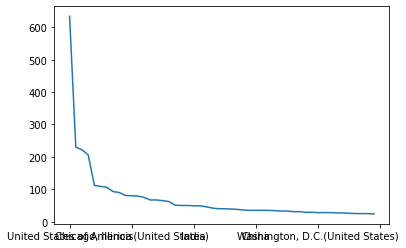

In [293]:
df['settings'].value_counts(sort=True).iloc[:50].plot()

In [294]:
df['settings'].value_counts(sort=True)[:20]

United States of America                    634
London, England                             230
United Kingdom                              222
New York City, New York(United States)      206
New York State(United States)               112
England                                     109
California(United States)                   106
Paris(France)                                93
Los Angeles, California(United States)       90
Egypt                                        81
Chicago, Illinois(United States)             80
Japan                                        79
San Francisco, California(United States)     75
France                                       67
New Orleans, Louisiana(United States)        67
Boston, Massachusetts(United States)         65
Seattle, Washington(United States)           62
Australia                                    51
Maine(United States)                         50
Florida(United States)                       50
Name: settings, dtype: int64

In [295]:
df['settings'].describe()

count                        11515
unique                        5338
top       United States of America
freq                           634
Name: settings, dtype: object

Since there are 5338 unique values, it is not able to use this data to classify, so for the book setting, only keep the country name, for example, 'California(United States)' -> 'United States of America'

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

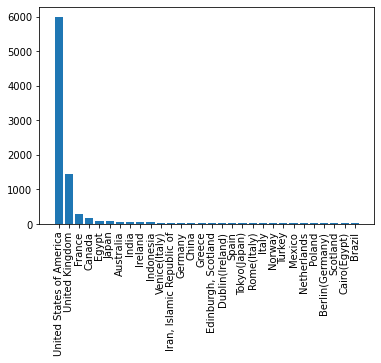

In [296]:
def country_name_convert(x):
    if x is np.NaN:
        return np.NaN
    elif '(United States)' in x:
        return 'United States of America'
    elif 'England' in x:
        return 'United Kingdom'
    elif '(Canada)' in x:
        return 'Canada'
    elif '(France)' in x:
        return 'France'
    else:
        return x
df['setting_country'] = df['settings'].apply(lambda x:country_name_convert(x))
value_count = pd.DataFrame(df['setting_country'].value_counts(sort= True)[:30])
plt.bar(value_count.index, value_count['setting_country'])
plt.xticks(rotation=90)

It is obviously that the most of books' setting is in the US or in the UK, therefore, convert the 'setting' into three possible value: US, UK and Other (Which means the setting of the book is not in the US or the UK)

<BarContainer object of 4 artists>

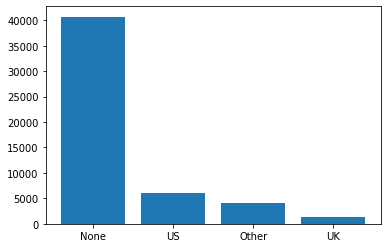

In [297]:
def regen_setting(x):
    if x is np.NaN:
        return 'None'
    elif not x in ['United States of America', 'United Kingdom']:
        return "Other"
    elif x == 'United States of America':
        return 'US'
    elif x == 'United Kingdom':
        return 'UK'
df['settings'] = df['setting_country'].apply(lambda x:regen_setting(x))
value_count = pd.DataFrame(df['settings'].value_counts(sort=True))
plt.bar(value_count.index, value_count['settings'])

In [300]:
df.drop(columns=['setting_country'], inplace=True)
df.head()

,id,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,number_of_pages,genre_and_votes,settings,Target,title_words_count,in_series,author_count,publish_years_to_now,characters_count,series_total_count
0,630104,7597.0,196.0,4.03,3045.0,2323.0,1748.0,389.0,92.0,220.0,"Young Adult 161, Mystery 45, Romance 32",None,0.0,2,1,2,14.0,0,10
1,9487,4179.0,177.0,4.35,2255.0,1290.0,518.0,93.0,23.0,400.0,"Christian Fiction 114, Christian 45, Fiction 3...",None,0.0,4,1,1,15.0,0,1
2,6050894,6288.0,218.0,4.23,3000.0,2020.0,1041.0,183.0,44.0,320.0,"Christian Fiction 174, Christian 81, Fiction 58",US,0.0,2,1,1,12.0,0,3
3,39030,38382.0,1424.0,4.01,12711.0,15407.0,8511.0,1429.0,324.0,464.0,"Thriller 626, Mystery 493, Horror 432, Fiction...",US,0.0,1,1,2,24.0,8,10
4,998,72168.0,3217.0,4.04,27594.0,25219.0,14855.0,3414.0,1086.0,258.0,"Economics-Finance 1162, Nonfiction 910, Busine...",None,1.0,10,0,2,26.0,0,0


In [311]:
df['four_star_ratings'].loc[lambda x: x.isna()]

8127    NaN
8128    NaN
28179   NaN
28180   NaN
28181   NaN
28182   NaN
28183   NaN
29831   NaN
29832   NaN
32734   NaN
32735   NaN
32736   NaN
45164   NaN
45165   NaN
45520   NaN
45521   NaN
Name: four_star_ratings, dtype: float64